In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.api.types import CategoricalDtype
# Simple & Easy way to overview dataset
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

Description of the data (with the calculation of basic statistics);
Research of dependencies and formulation of hypotheses;
Building models for predicting the outflow (with justification for the choice of a particular model) based on tested hypotheses and identified relationships;
Comparison of the quality of the obtained models.


customerID - customer id

gender - client gender (male / female)

SeniorCitizen - is the client retired (1, 0)

Partner - is the client married (Yes, No)

tenure - how many months a person has been a client of the company

PhoneService - is the telephone service connected (Yes, No)

MultipleLines - are multiple phone lines connected (Yes, No, No phone service)

InternetService - client's Internet service provider (DSL, Fiber optic, No)

OnlineSecurity - is the online security service connected (Yes, No, No internet service)

OnlineBackup - is the online backup service activated (Yes, No, No internet service)

DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)

TechSupport - is the technical support service connected (Yes, No, No internet service)

StreamingTV - is the streaming TV service connected (Yes, No, No internet service)

StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)

Contract - type of customer contract (Month-to-month, One year, Two year)

PaperlessBilling - whether the client uses paperless billing (Yes, No)

PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - current monthly payment

TotalCharges - the total amount that the client paid for the services for the entire time

Churn - whether there was a churn (Yes or No)


In [21]:
data = pd.read_csv('...\\Telecom_Users\\telecom_users.csv')
data = data[data.columns[2::]]
df = data.copy()
df.head()
#df.to_excel('C:\\Users\\ase\\Desktop\\Telecom_Users\\telecom_users1.xls', sheet_name='sheet1', float_format = "%.2f")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


##### The data type of TotalCharges appears to be object, but it must be a float64 type. Convert that column's type.  

In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [24]:
df.isnull().values.any()

True

In [25]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [26]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


##### See that the values of tenure equal zero while  TotalCharges's value NaN. That reason we can fill zero instead NaN.

In [27]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [28]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Get a list of categorical variables of the data.

In [29]:
list_cat = list(df.select_dtypes(include = ["object"]))
list_cat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [11]:
# for cat in list_cat:
#     df[cat] = df[cat].map({'No': 0, 'Yes': 1, 'Fiber optic': 2, 'DSL': 1, 'No internet service': 0, 'No phone service':0,
#                            'Male': 0, 'Female': 1, 'Electronic check': 1, 'Mailed check': 2, 'Bank transfer (automatic)': 3,
#                           'Credit card (automatic)': 4, 'Month-to-month': 1, 'One year': 2, 'Two year': 3  })

df.head()
df['MultipleLines'] = df['MultipleLines'].astype(int)


In [19]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

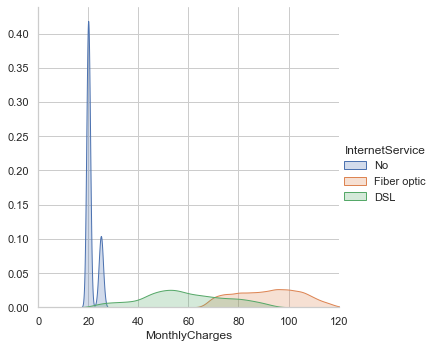

In [30]:
(sns.FacetGrid(df,
                hue = 'InternetService',
                height = 5,
                xlim = (0,120))
    .map(sns.kdeplot, 'MonthlyCharges', shade= True)
    .add_legend()
);
#'Fiber optic': 2, 'DSL': 1, 'No internet service': 0

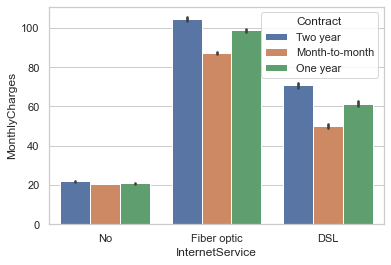

In [31]:
sns.barplot(x = "InternetService", y = "MonthlyCharges",  hue='Contract', data = df);
#'Month-to-month': 1, 'One year': 2, 'Two year': 3 

C:\Users\ase\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


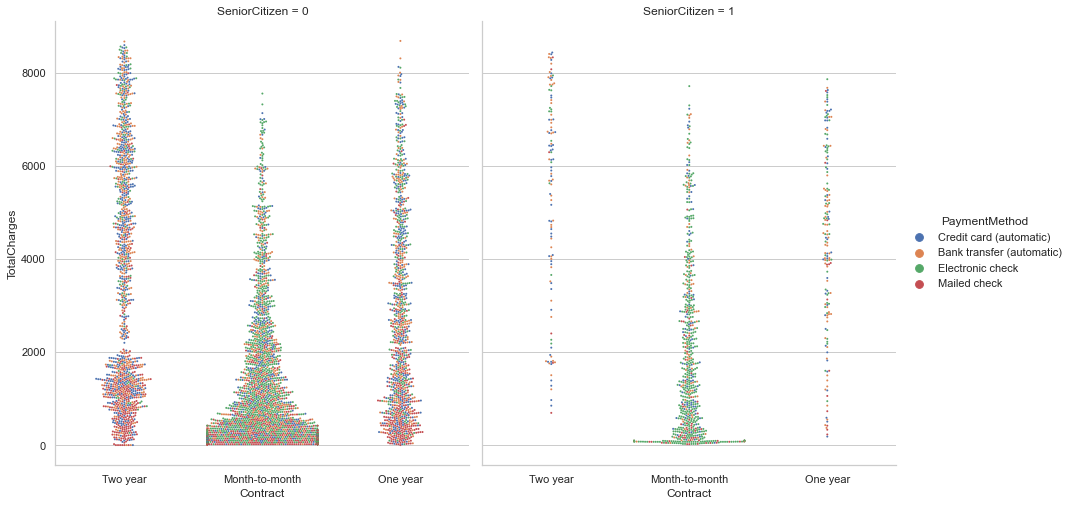

In [32]:

sns.set_theme(style="whitegrid")

g = sns.catplot(x="Contract", y="TotalCharges",
                hue="PaymentMethod", col="SeniorCitizen", s = 2,
                data=df, kind="swarm",
                height=7, aspect=.9);

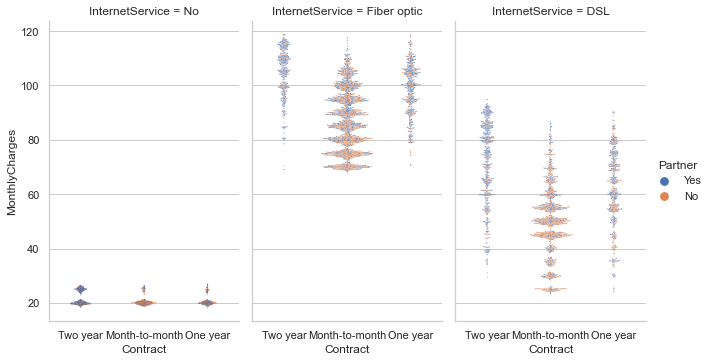

In [33]:
g = sns.catplot(x="Contract", y="MonthlyCharges",
                hue="Partner", col="InternetService",
                data=df, kind="swarm", s = 1,
                height=5, aspect=.6);

--- İnter

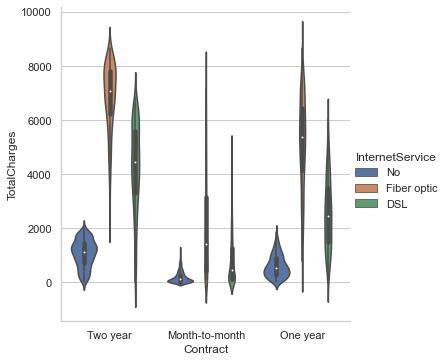

In [34]:
g = sns.catplot(x="Contract", y="TotalCharges", hue="InternetService",
               data=df, kind="violin")

   ## Build MLR

In [35]:
import statsmodels.formula.api as smf

In [37]:
lm2= smf.ols(formula = 'TotalCharges ~  C(InternetService)  + C(PhoneService) + C(SeniorCitizen) +  + tenure  ', data = df)
model= lm2.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TotalCharges   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     6973.
Date:                Sun, 01 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:45:29   Log-Likelihood:                -49011.
No. Observations:                5986   AIC:                         9.803e+04
Df Residuals:                    5980   BIC:                         9.807e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          -882.0468     38.988    -22.623      0.000    -958.478    -805.616
C(InternetService)[T.Fiber optic]   878.4847     28.870     30.429      0.000     821.890     935.079
C(InternetService)[T.No]          -1503.4329     33.238    -45.233      0.000   -1568.591   -1438.275
C(PhoneService)[T.Yes]              762.4510     42.444     17.964      0.000     679.245     845.657
C(SeniorCitizen)[T.1]               -67.6154     31.770     -2.128      0.033    -129.897      -5.334
tenure                               75.1059      0.460    163.450      0.000      74.205      76.007
==============================================================================
Omnibus:                       12.855   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.932
Skew:                           0.110   Prob(JB):                      0.00156
Kurtosis:                       2.943   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""